# __Análise dos resultados da Experimentação__

Esse notebook será usado apenas para analisar os dados resultantes do processo de experimentação. Esses dados serão importados e carregados para que algumas métricas possam ser observadas e, por conseguinte, conclusões possam ser tiradas. Todas as conclusões e discussões levantadas a partir da visualização dos dados serão melhor apresentadas no relatório do trabalho.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']  = (12, 6)
plt.rcParams['axes.labelsize']  = 12
plt.rcParams['axes.titlesize']  = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1

plt.ion()
plt.style.use('seaborn-colorblind')

Os dados são importados de um arquivo CSV que contém as seguintes colunas:

- __solver__: qual algoritmo/estratégia foi utilizada para resolver o problema do Caixeiro Viajante;
- __entrie__: a identificação da entrada, dada pelo número de nós presentes no grafo;
- __metric__: qual a métrica de distância entre os nós no grafo (distância Euclidiana ou Manhattan);
- __path__: a sequência de nós percorrida pelo algoritmo que resolve o problema;
- __cost__: a distância total percorrida pelo caminho retornado pelo algoritmo;
- __time__: quanto tempo o algoritmo demorou para retornar os resultados (em milisegundos);
- __space__: pico de uso de memória por parte do algoritmo (em bytes).

In [2]:
path = "../experiments/output.csv"
df = pd.read_csv(path)

df

,solver,entrie,metric,path,cost,time,space
0,branch-and-bound,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 3, 2, 12, 5, 15...",961.0,287730.015170,127696653.0
1,branch-and-bound,2^4,manhattan,"[0, 4, 7, 9, 10, 1, 15, 5, 12, 2, 3, 11, 13, 8...",1166.0,187857.253955,82134485.0
2,twice-around-the-tree,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 10, 1, 15, 5, 12, 3, 2,...",1076.0,2.630283,34697.0
3,twice-around-the-tree,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 15, 1, 5, 12...",1558.0,4.240884,34561.0
4,christofides,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 2, 3, 15, 1, 10...",1082.0,9.681829,148325.0
5,christofides,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 8, 14, 15, 1...",1414.0,10.625040,153989.0
6,branch-and-bound,2^5,euclidean,NaN,NaN,NaN,NaN
7,branch-and-bound,2^5,manhattan,NaN,NaN,NaN,NaN
8,twice-around-the-tree,2^5,euclidean,"[0, 10, 7, 31, 9, 15, 11, 19, 21, 26, 24, 1, 1...",1369.0,9.876181,70612.0
9,twice-around-the-tree,2^5,manhattan,"[0, 10, 7, 22, 3, 8, 20, 13, 17, 31, 9, 15, 11...",1964.0,8.960103,70900.0


In [3]:
df["time_sec"] = df["time"] * 0.001
df["time_min"] = df["time_sec"] / 60

df["space_kb"] = df["space"] * 0.001
df["space_mb"] = df["space_kb"] * 0.001

In [4]:
df

,solver,entrie,metric,path,cost,time,space,time_sec,time_min,space_kb,space_mb
0,branch-and-bound,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 3, 2, 12, 5, 15...",961.0,287730.015170,127696653.0,287.730015,4.795500,127696.653,127.696653
1,branch-and-bound,2^4,manhattan,"[0, 4, 7, 9, 10, 1, 15, 5, 12, 2, 3, 11, 13, 8...",1166.0,187857.253955,82134485.0,187.857254,3.130954,82134.485,82.134485
2,twice-around-the-tree,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 10, 1, 15, 5, 12, 3, 2,...",1076.0,2.630283,34697.0,0.002630,0.000044,34.697,0.034697
3,twice-around-the-tree,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 15, 1, 5, 12...",1558.0,4.240884,34561.0,0.004241,0.000071,34.561,0.034561
4,christofides,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 2, 3, 15, 1, 10...",1082.0,9.681829,148325.0,0.009682,0.000161,148.325,0.148325
5,christofides,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 8, 14, 15, 1...",1414.0,10.625040,153989.0,0.010625,0.000177,153.989,0.153989
6,branch-and-bound,2^5,euclidean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,branch-and-bound,2^5,manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,twice-around-the-tree,2^5,euclidean,"[0, 10, 7, 31, 9, 15, 11, 19, 21, 26, 24, 1, 1...",1369.0,9.876181,70612.0,0.009876,0.000165,70.612,0.070612
9,twice-around-the-tree,2^5,manhattan,"[0, 10, 7, 22, 3, 8, 20, 13, 17, 31, 9, 15, 11...",1964.0,8.960103,70900.0,0.008960,0.000149,70.900,0.070900


In [5]:
print("Tamanho do DF original:", len(df))

Tamanho do DF original: 42


In [6]:
df.isna().sum()

solver       0
entrie       0
metric       0
path        12
cost        12
time        12
space       12
time_sec    12
time_min    12
space_kb    12
space_mb    12
dtype: int64

In [7]:
filtered_df = df.dropna()
print("Tamanho do DF sem as linhas com colunas nulas: ", len(filtered_df))

Tamanho do DF sem as linhas com colunas nulas:  30


In [8]:
filtered_df.head()

,solver,entrie,metric,path,cost,time,space,time_sec,time_min,space_kb,space_mb
0,branch-and-bound,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 3, 2, 12, 5, 15...",961.0,287730.015170,127696653.0,287.730015,4.795500,127696.653,127.696653
1,branch-and-bound,2^4,manhattan,"[0, 4, 7, 9, 10, 1, 15, 5, 12, 2, 3, 11, 13, 8...",1166.0,187857.253955,82134485.0,187.857254,3.130954,82134.485,82.134485
2,twice-around-the-tree,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 10, 1, 15, 5, 12, 3, 2,...",1076.0,2.630283,34697.0,0.002630,0.000044,34.697,0.034697
3,twice-around-the-tree,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 15, 1, 5, 12...",1558.0,4.240884,34561.0,0.004241,0.000071,34.561,0.034561
4,christofides,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 2, 3, 15, 1, 10...",1082.0,9.681829,148325.0,0.009682,0.000161,148.325,0.148325


In [9]:
df.describe()

,cost,time,space,time_sec,time_min,space_kb,space_mb
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,4039.466667,28867.435523,2.959028e+07,28.867436,0.481124,29590.279367,29.590279
std,2896.710188,69848.918260,5.463986e+07,69.848918,1.164149,54639.861089,54.639861
min,961.000000,2.630283,3.456100e+04,0.002630,0.000044,34.561000,0.034561
25%,1623.000000,39.338497,2.575500e+05,0.039338,0.000656,257.550000,0.257550
50%,3240.000000,556.969517,3.472396e+06,0.556970,0.009283,3472.395500,3.472396
75%,5646.250000,7561.382196,4.065465e+07,7.561382,0.126023,40654.652500,40.654653
max,10930.000000,287730.015170,2.014025e+08,287.730015,4.795500,201402.461000,201.402461


In [10]:
entrie_2_4 = filtered_df[filtered_df["entrie"] == "2^4"]
entrie_2_5 = filtered_df[filtered_df["entrie"] == "2^5"]
entrie_2_6 = filtered_df[filtered_df["entrie"] == "2^6"]
entrie_2_7 = filtered_df[filtered_df["entrie"] == "2^7"]
entrie_2_8 = filtered_df[filtered_df["entrie"] == "2^8"]
entrie_2_9 = filtered_df[filtered_df["entrie"] == "2^9"]
entrie_2_10 = filtered_df[filtered_df["entrie"] == "2^10"]

In [11]:
entrie_2_4

,solver,entrie,metric,path,cost,time,space,time_sec,time_min,space_kb,space_mb
0,branch-and-bound,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 3, 2, 12, 5, 15...",961.0,287730.015170,127696653.0,287.730015,4.795500,127696.653,127.696653
1,branch-and-bound,2^4,manhattan,"[0, 4, 7, 9, 10, 1, 15, 5, 12, 2, 3, 11, 13, 8...",1166.0,187857.253955,82134485.0,187.857254,3.130954,82134.485,82.134485
2,twice-around-the-tree,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 10, 1, 15, 5, 12, 3, 2,...",1076.0,2.630283,34697.0,0.002630,0.000044,34.697,0.034697
3,twice-around-the-tree,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 15, 1, 5, 12...",1558.0,4.240884,34561.0,0.004241,0.000071,34.561,0.034561
4,christofides,2^4,euclidean,"[0, 4, 7, 9, 6, 14, 8, 13, 11, 2, 3, 15, 1, 10...",1082.0,9.681829,148325.0,0.009682,0.000161,148.325,0.148325
5,christofides,2^4,manhattan,"[0, 4, 7, 9, 6, 10, 3, 2, 11, 13, 8, 14, 15, 1...",1414.0,10.625040,153989.0,0.010625,0.000177,153.989,0.153989


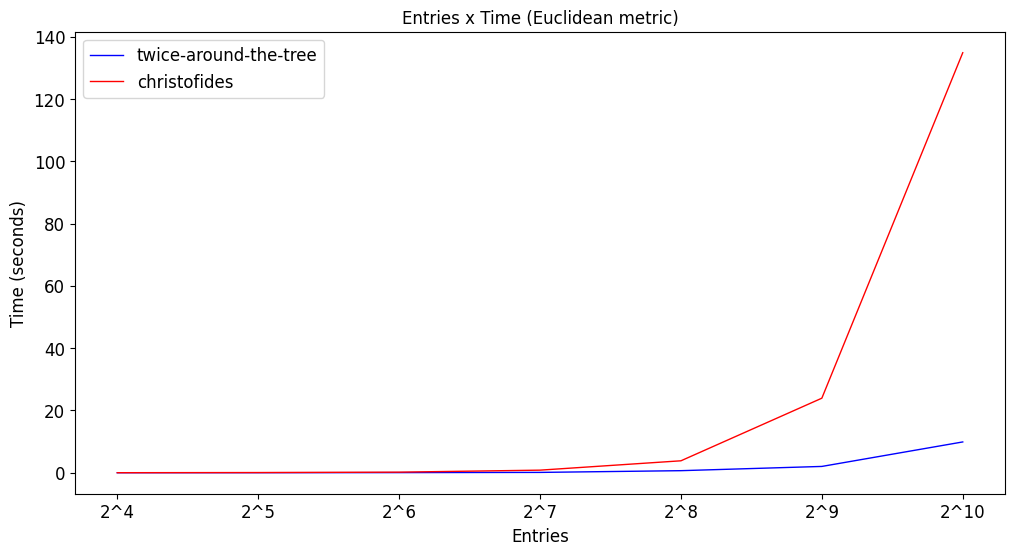

In [12]:
x_tat = filtered_df["entrie"].unique()
y_tat = filtered_df.query("solver == 'twice-around-the-tree' and metric == 'euclidean'")["time_sec"]

x_christofides = filtered_df["entrie"].unique()
y_christofides = filtered_df.query("solver == 'christofides' and metric == 'euclidean'")["time_sec"]

plt.plot(x_tat, y_tat, "b-", label="twice-around-the-tree")
plt.plot(x_christofides, y_christofides, "r-", label="christofides")

plt.xlabel("Entries")
plt.ylabel("Time (seconds)")
plt.title("Entries x Time (Euclidean metric)")

plt.legend()

plt.show()

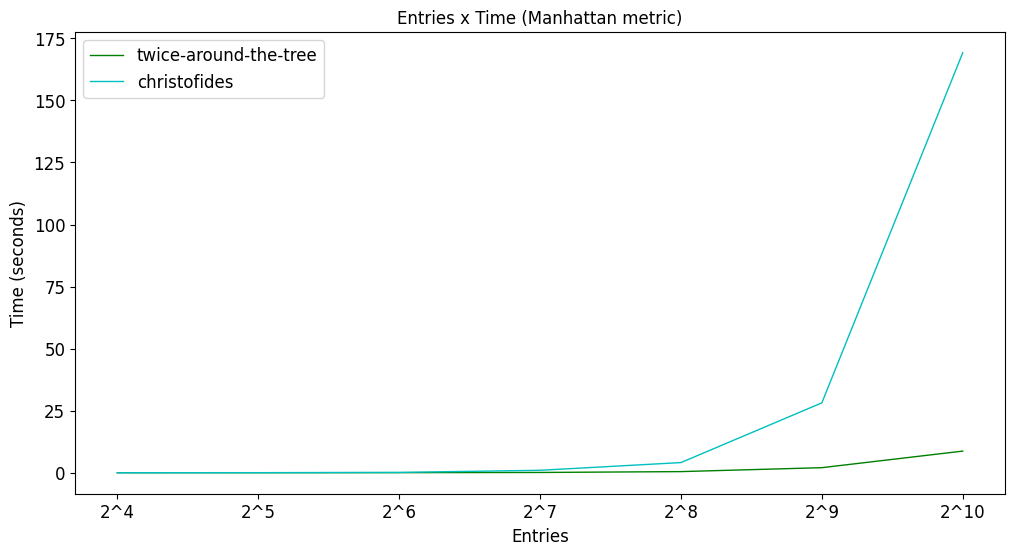

In [13]:
x_tat = filtered_df["entrie"].unique()
y_tat = filtered_df.query("solver == 'twice-around-the-tree' and metric == 'manhattan'")["time_sec"]

x_christofides = filtered_df["entrie"].unique()
y_christofides = filtered_df.query("solver == 'christofides' and metric == 'manhattan'")["time_sec"]

plt.plot(x_tat, y_tat, "g-", label="twice-around-the-tree")
plt.plot(x_christofides, y_christofides, "c-", label="christofides")

plt.xlabel("Entries")
plt.ylabel("Time (seconds)")
plt.title("Entries x Time (Manhattan metric)")

plt.legend()

plt.show()

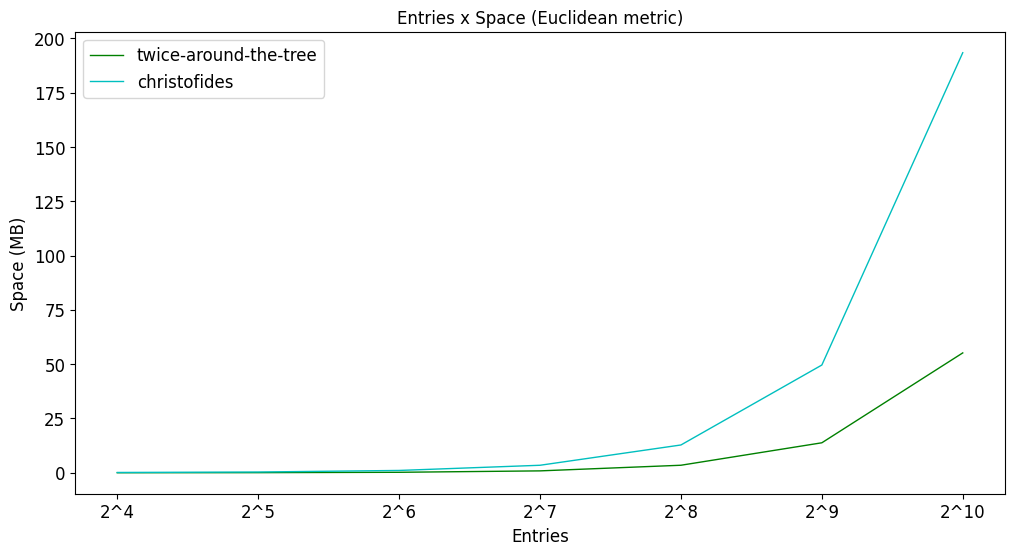

In [14]:
x_tat = filtered_df["entrie"].unique()
y_tat = filtered_df.query("solver == 'twice-around-the-tree' and metric == 'euclidean'")["space_mb"]

x_christofides = filtered_df["entrie"].unique()
y_christofides = filtered_df.query("solver == 'christofides' and metric == 'euclidean'")["space_mb"]

plt.plot(x_tat, y_tat, "g-", label="twice-around-the-tree")
plt.plot(x_christofides, y_christofides, "c-", label="christofides")

plt.xlabel("Entries")
plt.ylabel("Space (MB)")
plt.title("Entries x Space (Euclidean metric)")

plt.legend()

plt.show()

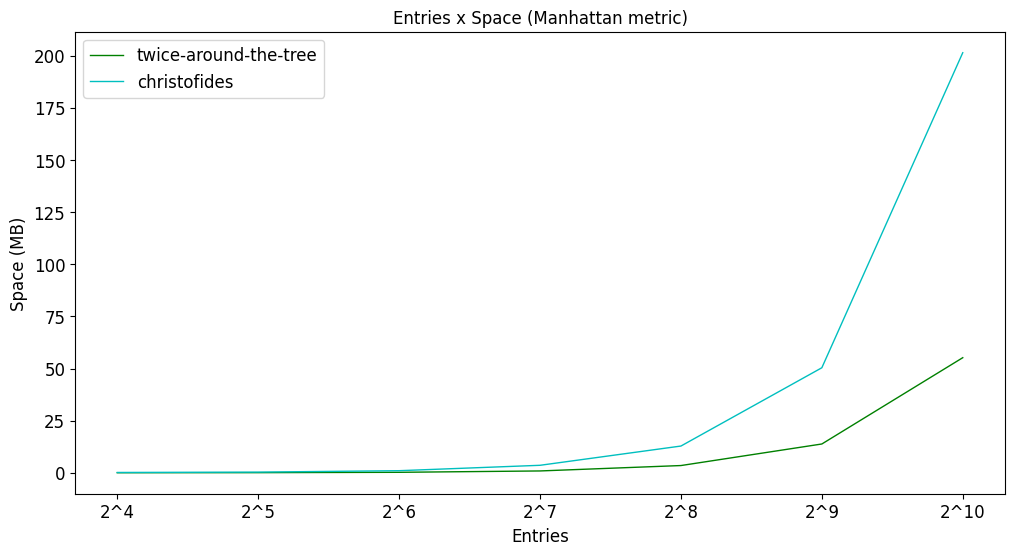

In [15]:
x_tat = filtered_df["entrie"].unique()
y_tat = filtered_df.query("solver == 'twice-around-the-tree' and metric == 'manhattan'")["space_mb"]

x_christofides = filtered_df["entrie"].unique()
y_christofides = filtered_df.query("solver == 'christofides' and metric == 'manhattan'")["space_mb"]

plt.plot(x_tat, y_tat, "g-", label="twice-around-the-tree")
plt.plot(x_christofides, y_christofides, "c-", label="christofides")

plt.xlabel("Entries")
plt.ylabel("Space (MB)")
plt.title("Entries x Space (Manhattan metric)")

plt.legend()

plt.show()

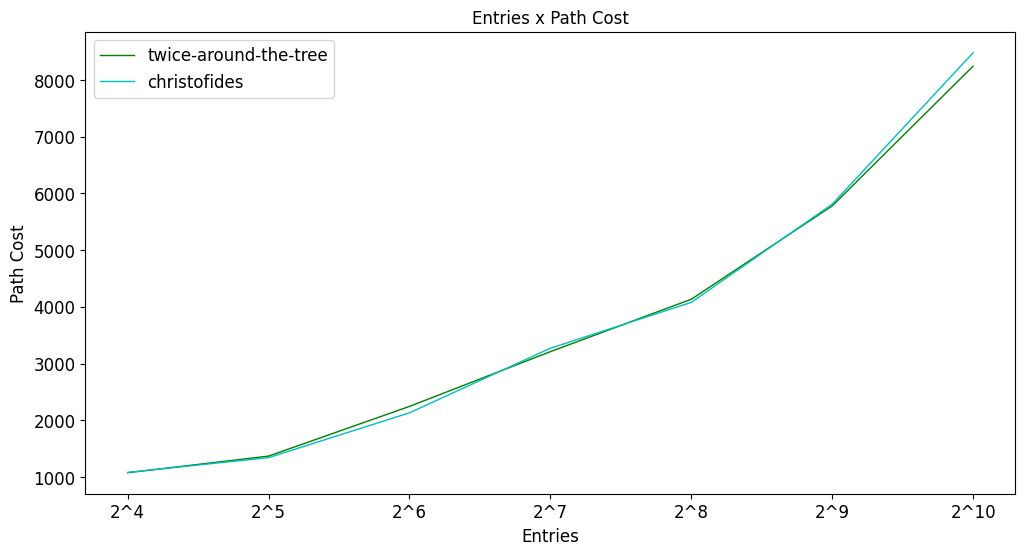

In [16]:
x_tat = filtered_df["entrie"].unique()
y_tat = filtered_df.query("solver == 'twice-around-the-tree' and metric == 'euclidean'")["cost"]

x_christofides = filtered_df["entrie"].unique()
y_christofides = filtered_df.query("solver == 'christofides' and metric == 'euclidean'")["cost"]

plt.plot(x_tat, y_tat, "g-", label="twice-around-the-tree")
plt.plot(x_christofides, y_christofides, "c-", label="christofides")

plt.xlabel("Entries")
plt.ylabel("Path Cost")
plt.title("Entries x Path Cost")

plt.legend()

plt.show()

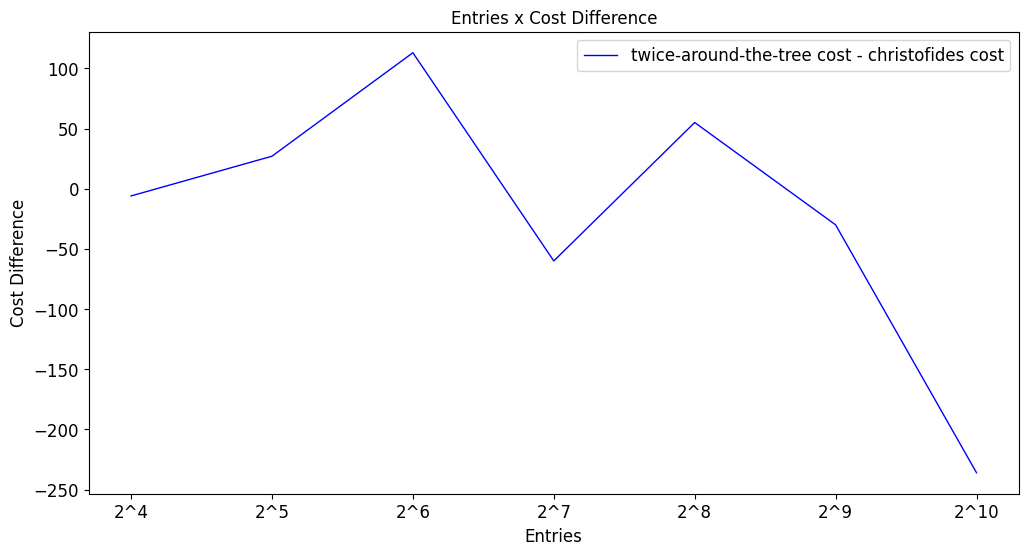

In [17]:
x = filtered_df["entrie"].unique()
y_diff = y_tat.values - y_christofides.values

plt.plot(x, y_diff, "b-", label="twice-around-the-tree cost - christofides cost")

plt.xlabel("Entries")
plt.ylabel("Cost Difference")
plt.title("Entries x Cost Difference")

plt.legend()

plt.show()